## Assignment 2
## Guru Charan

In [107]:
#import packages
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from scipy.stats import zscore

# 1.Consider the heart disease dataset in pandas dataframe 

Read the dataset and study it 

In [108]:
heartDf=pd.read_csv("../../../Csv/heart.csv")
heartDf.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [109]:
heartDf.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [110]:
heartDf.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [111]:
heartDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### No null values 

In [112]:
heartDf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Todo Outliers

In [113]:
# Method 1: Using Mean and Standard Deviation
heart_df_mean_std = heartDf.copy()
for column in heart_df_mean_std.select_dtypes(include=[np.number]).columns:
    mean = heart_df_mean_std[column].mean()
    std = heart_df_mean_std[column].std()
    heart_df_mean_std = heart_df_mean_std[(heart_df_mean_std[column] >= mean - 3*std) & (heart_df_mean_std[column] <= mean + 3*std)]

# Method 2: Using Median and IQR
heart_df_iqr = heartDf.copy()
for column in heart_df_iqr.select_dtypes(include=[np.number]).columns:
    Q1 = heart_df_iqr[column].quantile(0.25)
    Q3 = heart_df_iqr[column].quantile(0.75)
    IQR = Q3 - Q1
    heart_df_iqr = heart_df_iqr[(heart_df_iqr[column] >= Q1 - 1.5*IQR) & (heart_df_iqr[column] <= Q3 + 1.5*IQR)]

# Method 3: Using Z-Score
heart_df_zscore = heartDf.copy()
z_scores = np.abs(zscore(heart_df_zscore.select_dtypes(include=[np.number])))
heart_df_zscore = heart_df_zscore[(z_scores < 3).all(axis=1)]

methods = ['Original', 'Mean & Std Dev', 'Median & IQR', 'Z-Score']
row_counts = [
    heartDf.shape[0],
    heart_df_mean_std.shape[0],
    heart_df_iqr.shape[0],
    heart_df_zscore.shape[0]
]

# Next, I will use the dataset obtained from the Z-score method.
heartDf = heart_df_zscore

* Original: The dataset's original size before any outlier removal.
* Mean & Std Dev: Data points retained after removing outliers based on mean and standard deviation.
* Median & IQR: Data points retained after removing outliers using the median and interquartile range (IQR).
* Z-Score: Data points retained after removing outliers based on Z-scores.

In [114]:
# find the categorical values..
print(heartDf["RestingECG"].unique())
print(heartDf["ST_Slope"].unique())
print(heartDf["Sex"].unique())
print(heartDf["ChestPainType"].unique())
print(heartDf["ExerciseAngina"].unique())

['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']
['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['N' 'Y']


## Convert 'Sex' and 'ExerciseAngina' columns value from categorial to numerical values using label encoding because it is a binary type category.<br>
## For rest all use hot-encoding to convert.

In [115]:
categoricalColumns = heartDf.select_dtypes(include=['object']).columns
cols = {column: heartDf[column].unique() for column in categoricalColumns}
cols

{'Sex': array(['M', 'F'], dtype=object),
 'ChestPainType': array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object),
 'RestingECG': array(['Normal', 'ST', 'LVH'], dtype=object),
 'ExerciseAngina': array(['N', 'Y'], dtype=object),
 'ST_Slope': array(['Up', 'Flat', 'Down'], dtype=object)}

In [116]:
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()
heartDf['Sex'] = labelEnc.fit_transform(heartDf['Sex'])
heartDf['ExerciseAngina'] = labelEnc.fit_transform(heartDf['ExerciseAngina'])
heartDf = pd.get_dummies(heartDf, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
display(heartDf)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,0,0.0,1,True,False,False,False,False,True,False


Now Scaling is done to normalise the data 

In [117]:
from sklearn.preprocessing import StandardScaler
X = heartDf.drop("HeartDisease", axis=1)
y = heartDf["HeartDisease"]
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_ScaledDf = pd.DataFrame(X_Scaled, columns=X.columns)
X_ScaledDf.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.515943,0.465900,0.849636,-0.550362,1.384320,-0.822945,-0.855469,2.063325,-0.534905,-0.22955,0.809702,-0.489898,-0.998888,1.134695
1,-0.475855,-1.938199,1.634714,-0.168122,-0.550362,0.752973,-0.822945,0.137516,-0.484655,1.869492,-0.22955,0.809702,-0.489898,1.001113,-0.881294
2,-1.745588,0.515943,-0.118507,0.793612,-0.550362,-1.535661,-0.822945,-0.855469,2.063325,-0.534905,-0.22955,-1.235023,2.041241,-0.998888,1.134695
3,-0.581666,-1.938199,0.349019,0.149344,-0.550362,-1.141069,1.215148,0.634008,-0.484655,-0.534905,-0.22955,0.809702,-0.489898,1.001113,-0.881294
4,0.053200,0.515943,1.050307,-0.028064,-0.550362,-0.588640,-0.822945,-0.855469,-0.484655,1.869492,-0.22955,0.809702,-0.489898,-0.998888,1.134695


Classification model support vector machine

In [118]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=29)

X_train.shape, X_test.shape

((719, 15), (180, 15))

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svmModel = SVC().fit(X_train, y_train)

svmPredictions = svmModel.predict(X_test)

svmAccuracy = accuracy_score(y_test, svmPredictions)
svmClassificationReport = classification_report(y_test, svmPredictions)

print('SVM accuracy:',svmAccuracy)
print('SVM Classification')
print(svmClassificationReport)

SVM accuracy: 0.8388888888888889
SVM Classification
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        76
           1       0.86      0.86      0.86       104

    accuracy                           0.84       180
   macro avg       0.83      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



Standalone model as well as Bagging model and include observations about the performance

In [122]:
#Bagging classifier with SVM
from sklearn.ensemble import BaggingClassifier

bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

bagging_svm_predictions = bagging_svm.predict(X_test)

bagging_svm_accuracy = accuracy_score(y_test, bagging_svm_predictions)
bagging_svm_classification_report = classification_report(y_test, bagging_svm_predictions)

print('Bagging classifier with SVM accuracy:',bagging_svm_accuracy)
print('Bagging classifier with SVM Classification')
print(bagging_svm_classification_report)

Bagging classifier with SVM accuracy: 0.8444444444444444
Bagging classifier with SVM Classification
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        76
           1       0.89      0.84      0.86       104

    accuracy                           0.84       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.84      0.85       180



* The standalone SVM model yields an accuracy of 83.88%, while the Bagging classifier with SVM slightly improves this to 84.44%. 
* Precision values are comparable for both models across the two classes. However, the recall for class 0 shows an enhancement in the Bagging classifier, increasing from 82% in SVM to 86%.
Overall, while both models exhibit good outcomes, the Bagging classifier provides a more balanced prediction across classes. The ensemble approach of Bagging offers better generalization, reducing variance and potentially enhancing performance on unseen data.

### Decision tree classifier.

In [124]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

print('Decision Tree accuracy:',dt_accuracy)
print('Decision Tree Classification')
print(dt_classification_report)

Decision Tree accuracy: 0.7888888888888889
Decision Tree Classification
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        76
           1       0.84      0.79      0.81       104

    accuracy                           0.79       180
   macro avg       0.78      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



Use standalone model as well as Bagging

In [125]:
bagging_dt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_dt.fit(X_train, y_train)

bagging_dt_predictions = bagging_dt.predict(X_test)

bagging_dt_accuracy = accuracy_score(y_test, bagging_dt_predictions)
bagging_dt_classification_report = classification_report(y_test, bagging_dt_predictions)

print('Bagging Classifier with Decision Tree accuracy:',bagging_dt_accuracy)
print('Bagging Classifier with Decision Tree Classification')
print(bagging_dt_classification_report)

Bagging Classifier with Decision Tree accuracy: 0.8388888888888889
Bagging Classifier with Decision Tree Classification
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        76
           1       0.91      0.80      0.85       104

    accuracy                           0.84       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.84      0.84       180



* The standalone Decision Tree model achieves an accuracy of 78%. When bolstered with Bagging, the accuracy sees an uplift to 83%. 
* Precision score also saw an uplift for class 0 from 73% to 76%, also for class 1, there's a noticeable increase from 84% to 91%. 

In Summarily, the Bagging classifier enhances the Decision Tree's overall accuracy and precision. The ensemble method of Bagging seems to make the model more conservative in its predictions for class 1, ensuring fewer false positives but missing out on some true positives. In essence, Bagging provides a more robust model with improved generalization capabilities, though with minor trade-offs in recall.

Comparing performance of svm and decision tree classifier

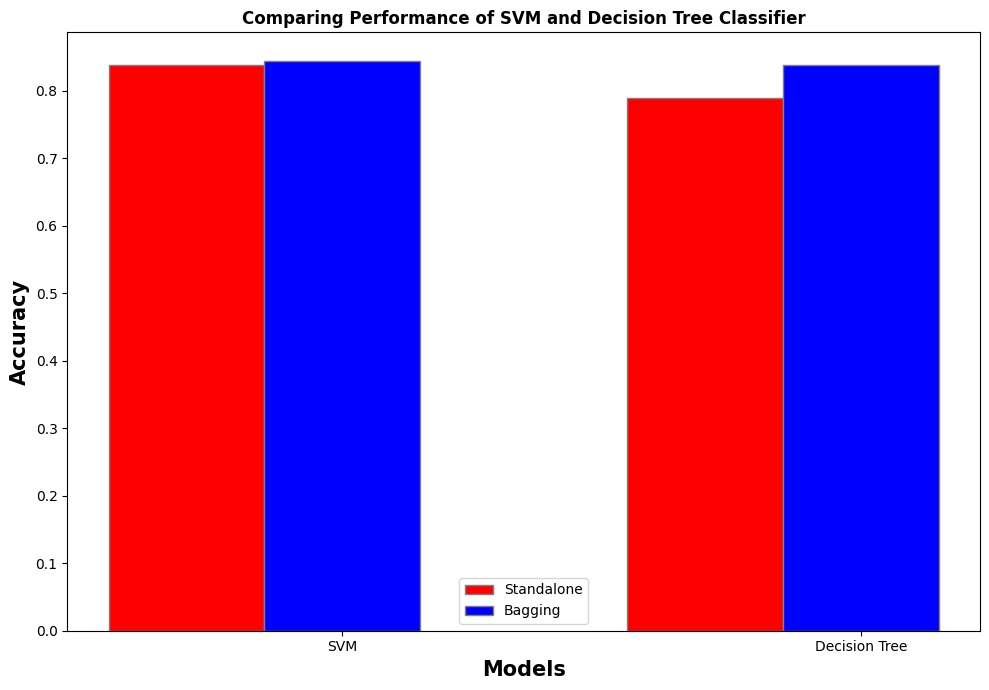

In [129]:
models = ['SVM', 'Decision Tree']
standalone_accuracies = [svmAccuracy, dt_accuracy]
bagging_accuracies = [bagging_svm_accuracy, bagging_dt_accuracy]

barWidth = 0.3
r1 = range(len(standalone_accuracies))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(10, 7))
plt.bar(r1, standalone_accuracies, width=barWidth, color='red', edgecolor='grey', label='Standalone')
plt.bar(r2, bagging_accuracies, width=barWidth, color='blue', edgecolor='grey', label='Bagging')

plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(standalone_accuracies))], models)
plt.title('Comparing Performance of SVM and Decision Tree Classifier', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

Comparison between SVM and Decision Tree classifiers:

SVM: The Bagging approach offers a modest improvement over the standalone SVM.
Decision Tree: Bagging provides a more significant performance boost compared to its standalone counterpart.
Observations:

Conclusion: While Bagging enhances the performance for both models, it's particularly beneficial for high-variance models like **Decision Trees**. If computational resources allow, it makes sense to use Bagging, especially with algorithms that tend to overfit or show high sensitivity to training data.